<a href="https://colab.research.google.com/github/jobsiggang/-/blob/master/2026kerisdata4~5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install koreanize-matplotlib -q

In [10]:
import koreanize_matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 수집 및  탐색
https://data.kma.go.kr접속 [기후통계분석] > [조건별 통계]

In [17]:
# 1. 기온 데이터 불러오기
df_temp = pd.read_csv(
    'https://raw.githubusercontent.com/jobsiggang/2026_AI_Datascience/refs/heads/main/ulsan_temp.csv', encoding='cp949')
df_temp.tail(10)

,\t\t지점번호,지점명,일시,평균기온(℃),최고기온(℃),\t최고기온시각,최저기온(℃),최저기온시각,일교차
3651,\t\t152,울산,2025-12-30,3.6,7.7,13:38,-0.3,23:59,8.0
3652,\t\t152,울산,2025-12-31,-0.5,2.1,13:03,-4.3,23:58,6.4
3653,\t\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3654,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3655,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3656,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3657,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3658,\t\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3659,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3660,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3661 entries, 0 to 3660
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   		지점번호   3661 non-null   object 
 1   지점명      3653 non-null   object 
 2   일시       3653 non-null   object 
 3   평균기온(℃)  3653 non-null   float64
 4   최고기온(℃)  3653 non-null   float64
 5   	최고기온시각  3653 non-null   object 
 6   최저기온(℃)  3653 non-null   float64
 7   최저기온시각   3653 non-null   object 
 8   일교차      3653 non-null   float64
dtypes: float64(4), object(5)
memory usage: 257.5+ KB


In [18]:
# 2. 습도 데이터 불러오기
df_humi = pd.read_csv(
    'https://raw.githubusercontent.com/jobsiggang/2026_AI_Datascience/refs/heads/main/ulsan_humi.csv', encoding='cp949')
df_humi.tail(10)

,\t\t지점번호,지점명,일시,평균습도(%rh),최저습도(%rh)
3646,\t\t152,울산,2025-12-25,44.6,21.0
3647,\t\t152,울산,2025-12-26,23.5,13.0
3648,\t\t152,울산,2025-12-27,41.6,20.0
3649,\t\t152,울산,2025-12-28,55.5,38.0
3650,\t\t152,울산,2025-12-29,55.8,32.0
3651,\t\t152,울산,2025-12-30,37.9,13.0
3652,\t\t152,울산,2025-12-31,29.5,12.0
3653,\t\t,NaN,NaN,NaN,NaN
3654,\t,NaN,NaN,NaN,NaN
3655,\t,NaN,NaN,NaN,NaN


In [19]:
df_humi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3656 entries, 0 to 3655
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   		지점번호     3656 non-null   object 
 1   지점명        3653 non-null   object 
 2   일시         3653 non-null   object 
 3   평균습도(%rh)  3653 non-null   float64
 4   최저습도(%rh)  3653 non-null   float64
dtypes: float64(2), object(3)
memory usage: 142.9+ KB


## 데이터 전처리 및 병합


In [20]:
#결측치 확인
df_temp.isnull().sum()

,0
\t\t지점번호,0
지점명,8
일시,8
평균기온(℃),8
최고기온(℃),8
\t최고기온시각,8
최저기온(℃),8
최저기온시각,8
일교차,8


In [21]:
df_humi.isnull().sum()

,0
\t\t지점번호,0
지점명,3
일시,3
평균습도(%rh),3
최저습도(%rh),3


In [23]:
#결측치 삭제하자
df_temp = df_temp.dropna()
df_humi = df_humi.dropna()

In [24]:
#결측치 처리 확인하자
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3653 entries, 0 to 3652
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   		지점번호   3653 non-null   object 
 1   지점명      3653 non-null   object 
 2   일시       3653 non-null   object 
 3   평균기온(℃)  3653 non-null   float64
 4   최고기온(℃)  3653 non-null   float64
 5   	최고기온시각  3653 non-null   object 
 6   최저기온(℃)  3653 non-null   float64
 7   최저기온시각   3653 non-null   object 
 8   일교차      3653 non-null   float64
dtypes: float64(4), object(5)
memory usage: 285.4+ KB


In [25]:
df_humi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3653 entries, 0 to 3652
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   		지점번호     3653 non-null   object 
 1   지점명        3653 non-null   object 
 2   일시         3653 non-null   object 
 3   평균습도(%rh)  3653 non-null   float64
 4   최저습도(%rh)  3653 non-null   float64
dtypes: float64(2), object(3)
memory usage: 171.2+ KB


In [26]:
#컬럼명확인하고 복사해서 쓰자.
df_temp.columns

Index(['\t\t지점번호', '지점명', '일시', '평균기온(℃)', '최고기온(℃)', '\t최고기온시각', '최저기온(℃)',
       '최저기온시각', '일교차'],
      dtype='object')

In [27]:
df_humi.columns


Index(['\t\t지점번호', '지점명', '일시', '평균습도(%rh)', '최저습도(%rh)'], dtype='object')

In [28]:
#데이터 병합
df_merge = pd.merge(df_temp, df_humi, on=["\t\t지점번호", "지점명", "일시"], how="inner")
# df_merge = pd.merge(df_temp, df_humi, on=[ "일시"], how="inner") #이 코드로 했을때 문제점을 비교해 보세요.
df_merge.describe()

,평균기온(℃),최고기온(℃),최저기온(℃),일교차,평균습도(%rh),최저습도(%rh)
count,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000
mean,14.881768,19.615138,10.729702,8.885437,65.632822,44.409390
std,8.755660,8.658450,9.207146,3.168764,19.305312,21.101671
min,-8.700000,-4.900000,-13.600000,1.300000,16.800000,2.000000
25%,7.500000,12.500000,2.900000,6.800000,50.600000,26.000000
50%,15.500000,20.400000,10.800000,8.900000,68.600000,44.000000
75%,22.200000,26.500000,18.700000,11.000000,81.000000,60.000000
max,31.800000,37.300000,28.100000,19.100000,98.000000,98.000000


In [29]:
# * 일시 항목의 형식을 문자열에서 날짜 형식으로 변환하고 데이터 타입을 확인해 보자.
df_merge['일시']=pd.to_datetime(df_merge['일시'])
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   		지점번호     3653 non-null   object        
 1   지점명        3653 non-null   object        
 2   일시         3653 non-null   datetime64[ns]
 3   평균기온(℃)    3653 non-null   float64       
 4   최고기온(℃)    3653 non-null   float64       
 5   	최고기온시각    3653 non-null   object        
 6   최저기온(℃)    3653 non-null   float64       
 7   최저기온시각     3653 non-null   object        
 8   일교차        3653 non-null   float64       
 9   평균습도(%rh)  3653 non-null   float64       
 10  최저습도(%rh)  3653 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 314.1+ KB


In [30]:
# * ‘연도’와 ‘월’ 항목을 추가해 보자
df_merge["연도"] = df_merge["일시"].dt.year
df_merge["월"] = df_merge["일시"].dt.month
df_merge.head()

,\t\t지점번호,지점명,일시,평균기온(℃),최고기온(℃),\t최고기온시각,최저기온(℃),최저기온시각,일교차,평균습도(%rh),최저습도(%rh),연도,월
0,\t\t152,울산,2016-01-01,4.0,12.0,14:02,-1.6,7:08,13.6,53.3,20.0,2016,1
1,\t\t152,울산,2016-01-02,5.6,14.2,14:45,0.3,7:46,13.9,61.0,26.0,2016,1
2,\t\t152,울산,2016-01-03,7.0,15.6,13:46,0.7,6:09,14.9,76.4,36.0,2016,1
3,\t\t152,울산,2016-01-04,7.7,13.9,14:12,3.0,7:39,10.9,52.8,17.0,2016,1
4,\t\t152,울산,2016-01-05,3.9,7.8,16:14,0.7,4:38,7.1,31.9,8.0,2016,1


In [31]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   		지점번호     3653 non-null   object        
 1   지점명        3653 non-null   object        
 2   일시         3653 non-null   datetime64[ns]
 3   평균기온(℃)    3653 non-null   float64       
 4   최고기온(℃)    3653 non-null   float64       
 5   	최고기온시각    3653 non-null   object        
 6   최저기온(℃)    3653 non-null   float64       
 7   최저기온시각     3653 non-null   object        
 8   일교차        3653 non-null   float64       
 9   평균습도(%rh)  3653 non-null   float64       
 10  최저습도(%rh)  3653 non-null   float64       
 11  연도         3653 non-null   int32         
 12  월          3653 non-null   int32         
dtypes: datetime64[ns](1), float64(6), int32(2), object(4)
memory usage: 342.6+ KB


##  통계 분석 및 조건부 데이터 추출

In [32]:
df_merge.describe()

,일시,평균기온(℃),최고기온(℃),최저기온(℃),일교차,평균습도(%rh),최저습도(%rh),연도,월
count,3653,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000
mean,2020-12-31 00:00:00,14.881768,19.615138,10.729702,8.885437,65.632822,44.409390,2020.499589,6.522310
min,2016-01-01 00:00:00,-8.700000,-4.900000,-13.600000,1.300000,16.800000,2.000000,2016.000000,1.000000
25%,2018-07-02 00:00:00,7.500000,12.500000,2.900000,6.800000,50.600000,26.000000,2018.000000,4.000000
50%,2020-12-31 00:00:00,15.500000,20.400000,10.800000,8.900000,68.600000,44.000000,2020.000000,7.000000
75%,2023-07-02 00:00:00,22.200000,26.500000,18.700000,11.000000,81.000000,60.000000,2023.000000,10.000000
max,2025-12-31 00:00:00,31.800000,37.300000,28.100000,19.100000,98.000000,98.000000,2025.000000,12.000000
std,NaN,8.755660,8.658450,9.207146,3.168764,19.305312,21.101671,2.873056,3.449345


In [33]:
df_merge.columns

Index(['\t\t지점번호', '지점명', '일시', '평균기온(℃)', '최고기온(℃)', '\t최고기온시각', '최저기온(℃)',
       '최저기온시각', '일교차', '평균습도(%rh)', '최저습도(%rh)', '연도', '월'],
      dtype='object')

In [34]:
df_merge[["평균기온(℃)", "최고기온(℃)", "평균습도(%rh)"]].mean()
df_merge.loc[df_merge["일교차"].idxmax()]

,1565
\t\t지점번호,\t\t152
지점명,울산
일시,2020-04-14 00:00:00
평균기온(℃),14.4
최고기온(℃),23.2
\t최고기온시각,16:43
최저기온(℃),4.1
최저기온시각,5:36
일교차,19.1
평균습도(%rh),36.0


In [35]:
condition = (df_merge["평균기온(℃)"] >= 5) & (df_merge["평균습도(%rh)"] >= 50)
df_merge[condition]

,\t\t지점번호,지점명,일시,평균기온(℃),최고기온(℃),\t최고기온시각,최저기온(℃),최저기온시각,일교차,평균습도(%rh),최저습도(%rh),연도,월
1,\t\t152,울산,2016-01-02,5.6,14.2,14:45,0.3,7:46,13.9,61.0,26.0,2016,1
2,\t\t152,울산,2016-01-03,7.0,15.6,13:46,0.7,6:09,14.9,76.4,36.0,2016,1
3,\t\t152,울산,2016-01-04,7.7,13.9,14:12,3.0,7:39,10.9,52.8,17.0,2016,1
29,\t\t152,울산,2016-01-30,5.0,6.7,15:41,2.0,23:59,4.7,91.5,81.0,2016,1
41,\t\t152,울산,2016-02-11,6.7,14.2,13:51,-0.7,6:47,14.9,73.6,46.0,2016,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3640,\t\t152,울산,2025-12-19,10.3,16.8,13:24,2.7,6:11,14.1,74.9,51.0,2025,12
3641,\t\t152,울산,2025-12-20,13.2,18.5,13:50,7.4,7:20,11.1,78.9,62.0,2025,12
3644,\t\t152,울산,2025-12-23,7.1,12.0,14:59,1.2,6:28,10.8,71.3,54.0,2025,12
3645,\t\t152,울산,2025-12-24,7.3,8.4,0:23,5.6,23:57,2.8,91.9,83.0,2025,12


In [36]:
# *  월별 평균기온과 평균 습도의 평균을 확인해 보자.
df_monthly_mean = df_merge.groupby('월')[['평균기온(℃)', '평균습도(%rh)']].mean()

# 결과 확인
print(df_monthly_mean)

      평균기온(℃)  평균습도(%rh)
월                       
1    2.730645  48.535484
2    4.537102  49.898587
3    9.580000  58.957742
4   14.040667  61.726333
5   18.404516  65.315484
6   22.046000  75.936000
7   25.775161  82.507097
8   26.723871  80.554194
9   22.269333  81.317333
10  16.711290  72.651935
11  10.969667  59.892000
12   4.208065  49.458387


## 시각화 분석

---




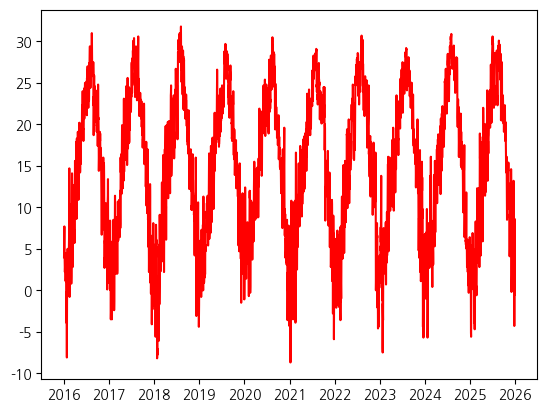

In [37]:
# 일시별 평균기온을 선 그래프를 시각화해 보고 이 지역의 기후적 특성을 분석해 보자.
plt.plot(df_merge['일시'], df_merge['평균기온(℃)'], color='red')
plt.show()

<BarContainer object of 4 artists>

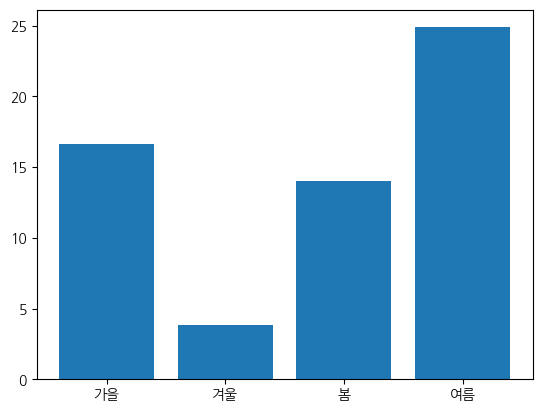

In [38]:
#계절별 평균기온을 구해보자
df_merge['계절'] = df_merge['월'].apply(lambda x: '봄' if 3 <= x <= 5 else ('여름' if 6 <= x <= 8 else ('가을' if 9 <= x <= 11 else '겨울')))
df_season_mean = df_merge.groupby('계절')['평균기온(℃)'].mean()
plt.bar(df_season_mean.index, df_season_mean.values)

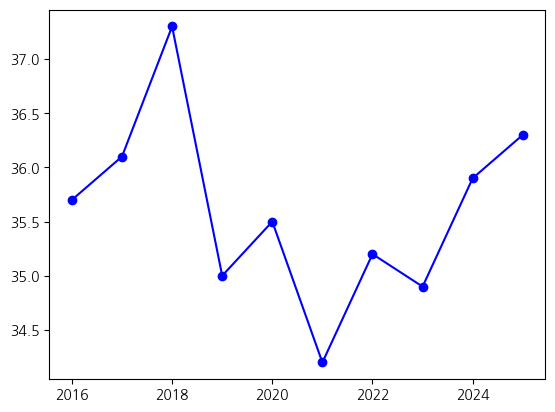

In [39]:
# 연도별 최고기온 변화 추이를 알아보자
df_year_max = df_merge.groupby('연도')['최고기온(℃)'].max()
plt.plot(df_year_max.index, df_year_max.values, marker='o', color='b')

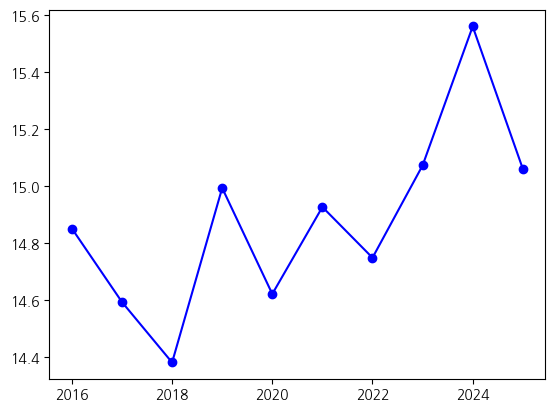

In [40]:
#연 평균기온의 변화를 그래프로 그려보자
df_year_mean = df_merge.groupby('연도')['평균기온(℃)'].mean()
plt.plot(df_year_mean.index, df_year_mean.values, marker='o', color='b')

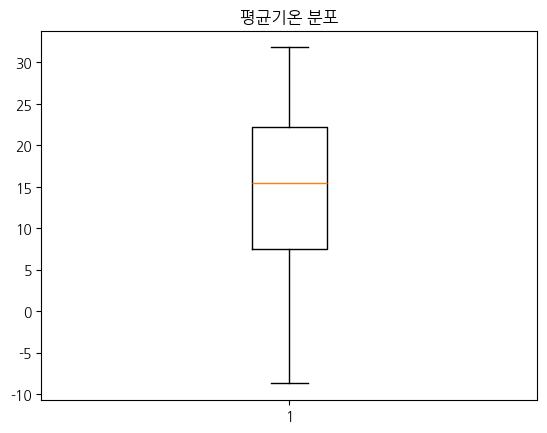

In [41]:
# 평균기온을 박스플롯으로 시각화하고 이 지역의 기후적 특성을 분석해 보자.
plt.boxplot(df_merge['평균기온(℃)'])
plt.title('평균기온 분포') # 제목 추가
plt.show()

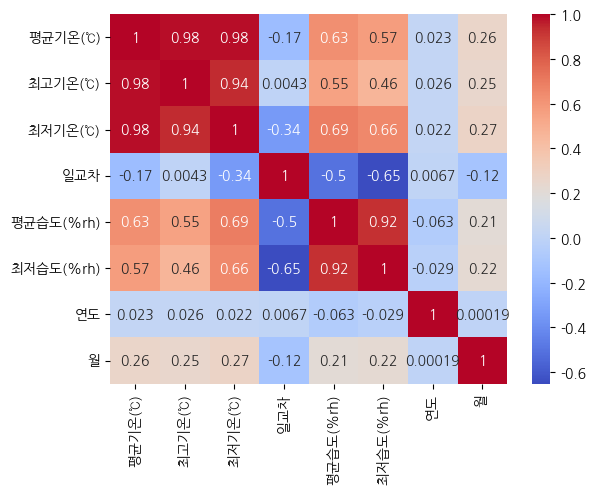

In [42]:
# 수치 데이터를 히트맵으로 시각화하고 기후적 특성을 분석해 보자
sns.heatmap(df_merge.corr(numeric_only='True'), annot=True, cmap='coolwarm')
plt.show()

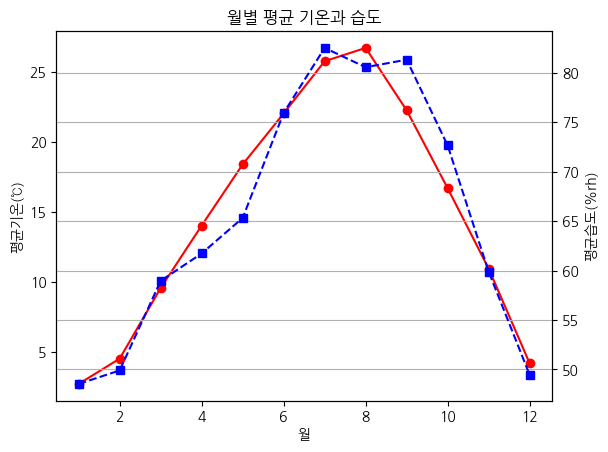

In [43]:
# 그래프에서 기온과 습도가 동시에 높게 나타나는 달은 언제이며, 그 달의 특징은 무엇인가?

fig, ax1 = plt.subplots()

# 평균 기온
ax1.plot(
    df_monthly_mean.index,
    df_monthly_mean['평균기온(℃)'],
    marker='o',color="r"
)
ax1.set_xlabel('월')
ax1.set_ylabel('평균기온(℃)')

# 평균 습도 (이중축)
ax2 = ax1.twinx()
ax2.plot(
    df_monthly_mean.index,
    df_monthly_mean['평균습도(%rh)'],
    marker='s',
    linestyle='--',
    color='b'
)
ax2.set_ylabel('평균습도(%rh)')

plt.title('월별 평균 기온과 습도')
plt.grid(True)
plt.show()
